Customer Data Safety Report  
***Otter River Software***  
  
---

 Leandro Lopez  
 Data Governance and Privacy, 5300OM  
 Merrimack College School of Science and Engineering  

---

![Abstract artwork generated by author using Stable Diffusion](image.jpeg)  
Abstract artwork generated by author using Stable Diffusion

---
  
  
  
  

  
   
  
  
# Introduction

Data is a highly regarded asset for Otter River Software. We believe that with the right approach, we can respect and honor the privacy of our clients while safely extracting value from our collected data. The following report details the process the author of this report, Leandro Lopez, underwent to ensure the safe and secure sale of data to our Telecom Partners. The report will attempt to answer the following questions:  

- Question 1: Before I mask my company’s data, what legal, ethical, and security requirements do I have to fulfill in order to ensure a high degree of data confidentiality before these data    can be prepared for sharing and released? 
                
- Question 2: What is the risk or likelihood of exposure of these data to the general population, or to a subset of this population, such as other employees others close to you?

To protect data, we will be redacting and removing data, masking data, and leveraging Differential Privacy techniques as defined by industry leaders (Dwork, 2016). We will then run risk calculations on our datasets and visualize the data using various graphs.

# Data Description

To start, we must read and describe the data. To manipulate and present our data, we will be using many libraries such as Pandas, Numpy, and MatPlotLib. We'll call our first 5 rows, along with the headers, to get a glimpse of our data set. By printing out only the columns, we can also see what type of values we're dealing with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import joypy

df = pd.read_csv('Customer_Survey.csv')

# The headers labels and top 5 rows. Notice the headers are truncated.
df.head(5)


,CustomerID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,Retired,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1,2,1,20,15,1,1,0,0,...,1,1,1,0,13,0,1,1,0,0
1,0648-AIPJSP-UVM,5,5,0,22,17,2,0,0,0,...,0,1,0,1,18,1,1,1,1,1
2,5195-TLUDJE-HVO,3,4,1,67,14,2,0,16,0,...,0,0,0,0,21,0,0,0,0,1
3,4459-VLPQUH-3OL,4,3,0,23,16,2,0,0,0,...,0,0,0,1,26,1,1,1,0,1
4,8158-SMTQFB-CNO,2,2,0,26,16,2,0,1,0,...,1,1,1,0,27,1,0,1,0,0


In [2]:
# All of our columns
df.columns

Index(['CustomerID', 'Region', 'TownSize', 'Gender', 'Age', 'EducationYears',
       'JobCategory', 'UnionMember', 'EmploymentLength', 'Retired',
       'HouseholdIncome', 'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt',
       'LoanDefault', 'MaritalStatus', 'HouseholdSize', 'NumberPets',
       'NumberCats', 'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned',
       'CarOwnership', 'CarBrand', 'CarValue', 'CommuteTime', 'Telecommute',
       'PoliticalPartyMem', 'Votes', 'CreditCard', 'CardTenure',
       'CardItemsMonthly', 'CardSpendMonthly', 'ActiveLifestyle',
       'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure', 'EquipmentRental',
       'EquipmentLastMonth', 'EquipmentOverTenure', 'CallingCard',
       'WirelessData', 'DataLastMonth', 'DataOverTenure', 'Multiline', 'VM',
       'Pager', 'Internet', 'CallerID', 'CallWait', 'CallForward',
       'ThreeWayCalling', 'EBilling', 'TVWatchingHours', 'OwnsPC',
       'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax', 'NewsSubscri

By just calling up the first 5 rows and paying attention to the headers, we can spot a direct identifier: CustomerID. We will mask these values. We also have other quasi-identifiers to look at. One technique, *binning*, can help us anonymize data like age or financial information. For instance, we can sort age data by mapping it to "bins" so that "27 years old" becomes "24 - 34 age range."

Because re-identification attacks happen when multiple data sets are compared, we will be redacting information that we believe can be used to identify other data sets for use in linkage attacks. Those columns we have selected are *'UnionMember', 'Retired', 'PoliticalPartyMem'.* If an intruder wants to identify individuals in our set, cross-referencing data sets that contain information on Union or Political Party membership could allow for re-identification. A 2016 "study found that 72.7% of all successful re-identification attacks have taken place since 2009," meaning that attacks are becoming more frequent (Henriksen-Bulmer & Jeary, 2016).

Since the intended research of our data set will not pertain to topics associated with *'UnionMember', 'Retired', 'PoliticalPartyMem',* we see minimal harm in removing the values, and only see benefits for privacy. 

In [3]:
df.drop(['CustomerID','UnionMember', 'Retired', 'PoliticalPartyMem'], axis=1, inplace=True)
df

,Region,TownSize,Gender,Age,EducationYears,JobCategory,EmploymentLength,HouseholdIncome,DebtToIncomeRatio,CreditDebt,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,1,2,1,20,15,1,0,31,11.1,1.200909,...,1,1,1,0,13,0,1,1,0,0
1,5,5,0,22,17,2,0,15,18.6,1.222020,...,0,1,0,1,18,1,1,1,1,1
2,3,4,1,67,14,2,16,35,9.9,0.928620,...,0,0,0,0,21,0,0,0,0,1
3,4,3,0,23,16,2,0,20,5.7,0.022800,...,0,0,0,1,26,1,1,1,0,1
4,2,2,0,26,16,2,1,23,1.7,0.214659,...,1,1,1,0,27,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2,0,68,10,1,24,196,8.0,7.934080,...,0,0,0,0,19,0,0,0,0,1
4996,3,3,0,51,14,1,6,83,15.0,3.336600,...,1,1,1,0,14,0,0,0,0,0
4997,4,5,0,75,17,1,24,108,10.8,3.557520,...,1,1,1,0,16,0,0,0,0,1
4998,1,1,0,47,19,2,3,189,10.8,5.021352,...,0,0,0,1,24,1,1,1,0,1


# Masking Data
We will also mask certain data. These identifiers, like age, household income, or education, are less likely to recieve statiscal analysis so simply masking them is a reasonable solution. Masking them leaves them useful for the sake of helping creating insightful equivalence classes, like younger people in their early 20's vs those in their late 40's, while making it harder to identify any single individual.  

In formatting the bin labels for each category, we also define *upper and lower limits.* This allows us to individuals on the edges of a dataset. For instance, instead of having only 2 years of education a datapoint would only list "6 and Under" years.

## Masking Age

In [4]:
def format_bin_label(bin_label, lower_limit, upper_limit):
    lower, upper = bin_label.left, bin_label.right
    if lower < lower_limit:
        return f'{upper} and Under'
    elif upper > upper_limit:
        return f'{lower} and Over'
    else:
        return f'{lower} - {upper}'

In [5]:
bin_edges = [0, 24, 34, 44, 54, 64, 100]
lower_limit = 24
upper_limit = 64

df['Age'] = pd.cut(df['Age'], bins=bin_edges)

df['Age'] = df['Age'].apply(lambda x: format_bin_label(x, lower_limit, upper_limit))   

df[['Age',]]

,Age
0,24 and Under
1,24 and Under
2,64 and Over
3,24 and Under
4,24 - 34
...,...
4995,64 and Over
4996,44 - 54
4997,64 and Over
4998,44 - 54


## Masking Household Income

In [6]:
bin_edges = [0, 10, 40, 80, 120, 160, 200, 250, 300, 1100]
lower_limit = 10
upper_limit = 300

df['HouseholdIncome'] = pd.cut(df['HouseholdIncome'], bins=bin_edges)

df['HouseholdIncome'] = df['HouseholdIncome'].apply(lambda x: format_bin_label(x, lower_limit, upper_limit))    

df[['HouseholdIncome']]

,HouseholdIncome
0,10 - 40
1,10 - 40
2,10 - 40
3,10 - 40
4,10 - 40
...,...
4995,160 - 200
4996,80 - 120
4997,80 - 120
4998,160 - 200


## Masking Education

In [7]:
bin_edges = [0, 6, 12, 16, 24]
lower_limit = 6
upper_limit = 16

df['EducationYears'] = pd.cut(df['EducationYears'], bins=bin_edges)

df['EducationYears'] = df['EducationYears'].apply(lambda x: format_bin_label(x, lower_limit, upper_limit))

df[['EducationYears']]

,EducationYears
0,12 - 16
1,16 and Over
2,12 - 16
3,12 - 16
4,12 - 16
...,...
4995,6 - 12
4996,12 - 16
4997,16 and Over
4998,16 and Over


## Masking Employment Length

In [8]:
bin_edges = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 60]
lower_limit = 5
upper_limit = 25

df['EmploymentLength'] = pd.cut(df['EmploymentLength'], bins=bin_edges)

df['EmploymentLength'] = df['EmploymentLength'].apply(lambda x: format_bin_label(x, lower_limit, upper_limit))

df[['EmploymentLength']]

,EmploymentLength
0,5 and Under
1,5 and Under
2,15 - 20
3,5 and Under
4,5 and Under
...,...
4995,20 - 25
4996,5 - 10
4997,20 - 25
4998,5 and Under


# Outliers
In analyzing the data, we also found an outlier in one of the values--*CreditDebt*--where the larget value is almost double that of the second largest. Simply masking this data wouldn't be useful as it would distort our range and allow for this individual at risk for a linkage attack.

In [9]:
df[['CreditDebt']].sort_values('CreditDebt', ascending=False)

,CreditDebt
1102,109.072596
2192,67.490850
4916,48.704524
4412,44.245560
1770,42.098500
...,...
4898,0.006344
4046,0.004940
288,0.003410
4921,0.001364


With the following code, we remove the outlier and reset our indexes. 

In [10]:
df = df.drop(1102) # index of the outlier
df = df.reset_index(drop=True)
df[['CreditDebt']].sort_values('CreditDebt', ascending=False)

,CreditDebt
2191,67.490850
4915,48.704524
4411,44.245560
1769,42.098500
3067,35.252100
...,...
4897,0.006344
4045,0.004940
288,0.003410
4920,0.001364


# Differential Privacy

Because simply masking the data can further skew stastical analysis, we will instead be relying on differential privacy to allow for the extraction of maximum value while protecting sensitive information.  

To add noise for our differential privacy, we used the laplace mechanism (Roth, n.d.). Below, you will find density plots comparing 1) data sets with noise added to 2) original, noiseless data sets. This allows us to visualize the impact on safety and utility that our parameters provide. The difference in the data represents the noise, or safety added, while the overlap represents the utility. *Sensitivity* and *Epsilon* Values for each were settled upon after refining the values to get results we felt were acceptable. 


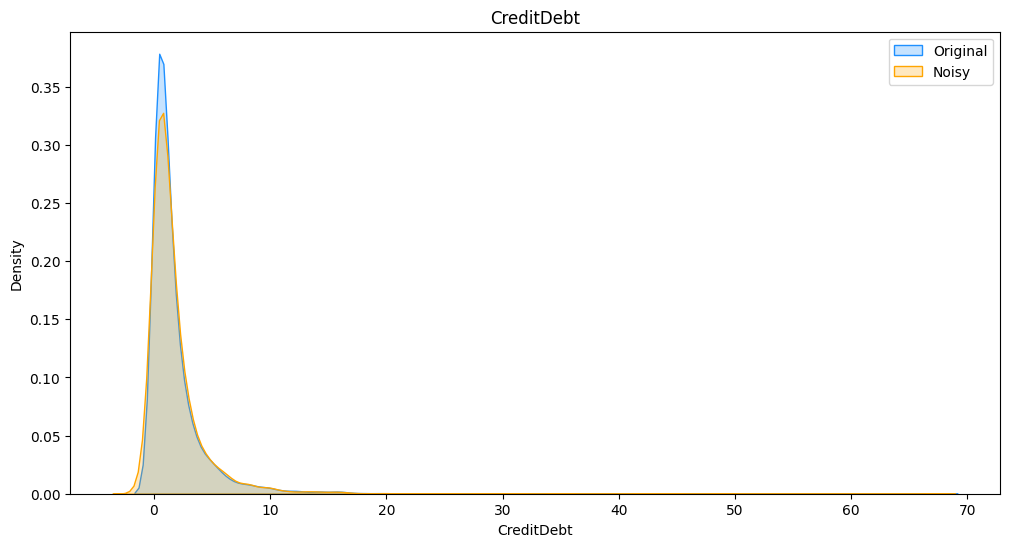

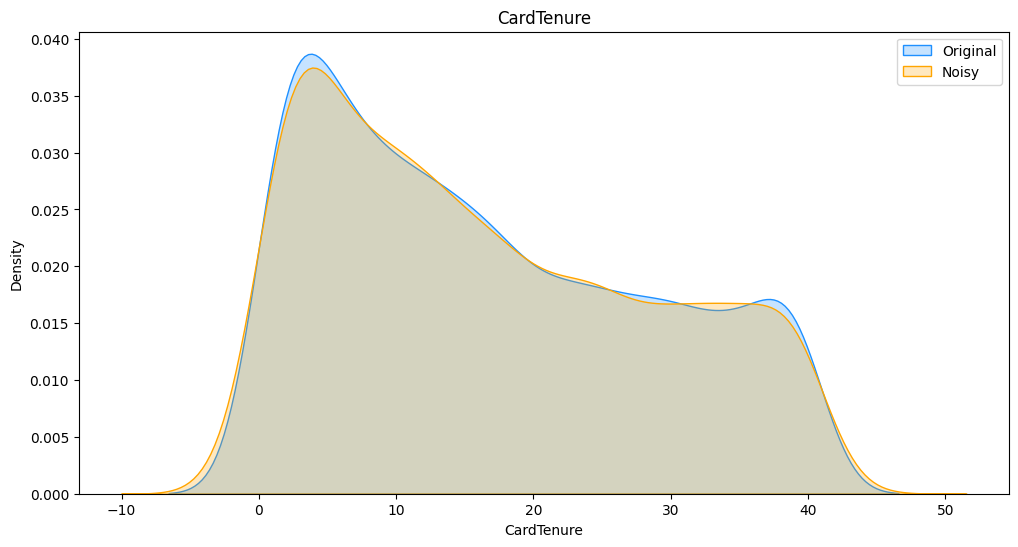

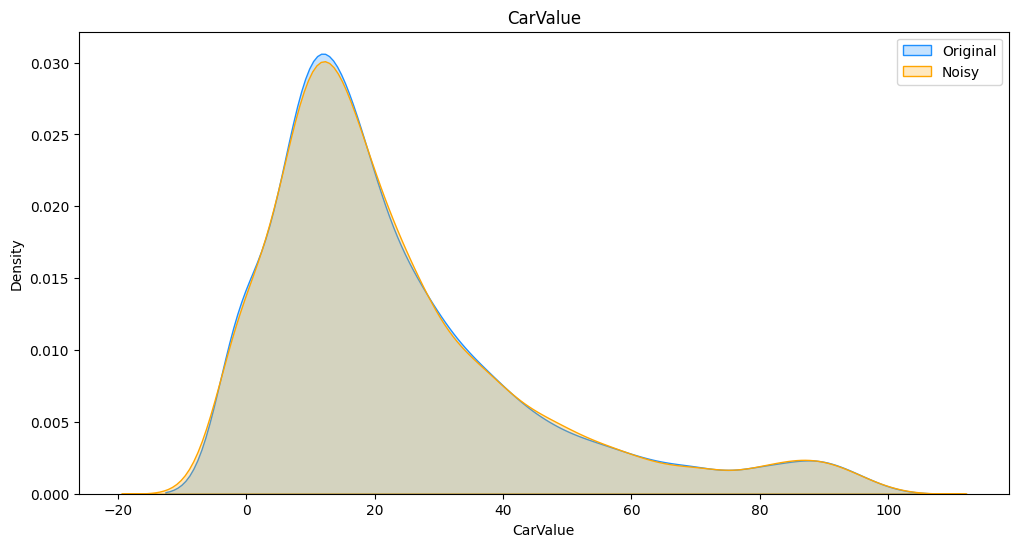

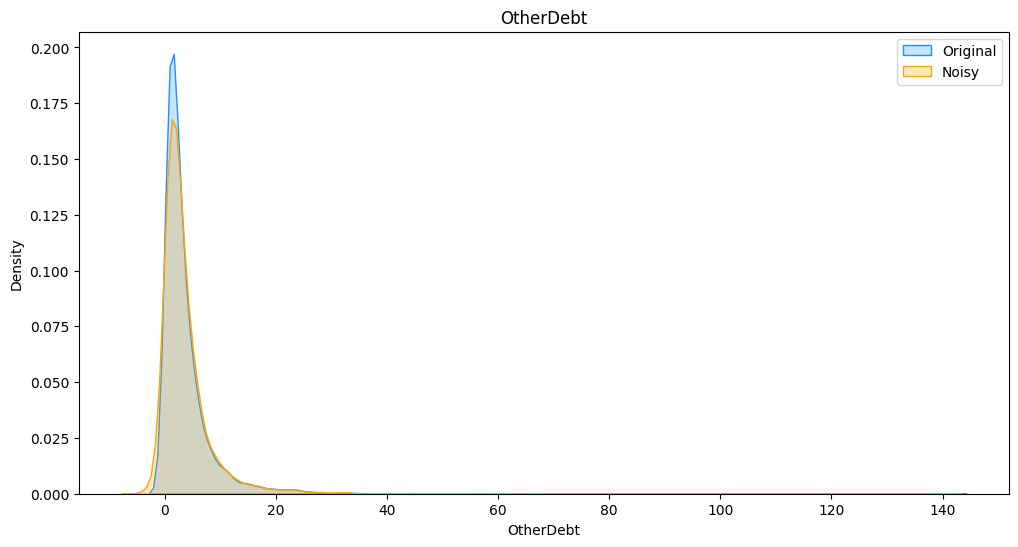

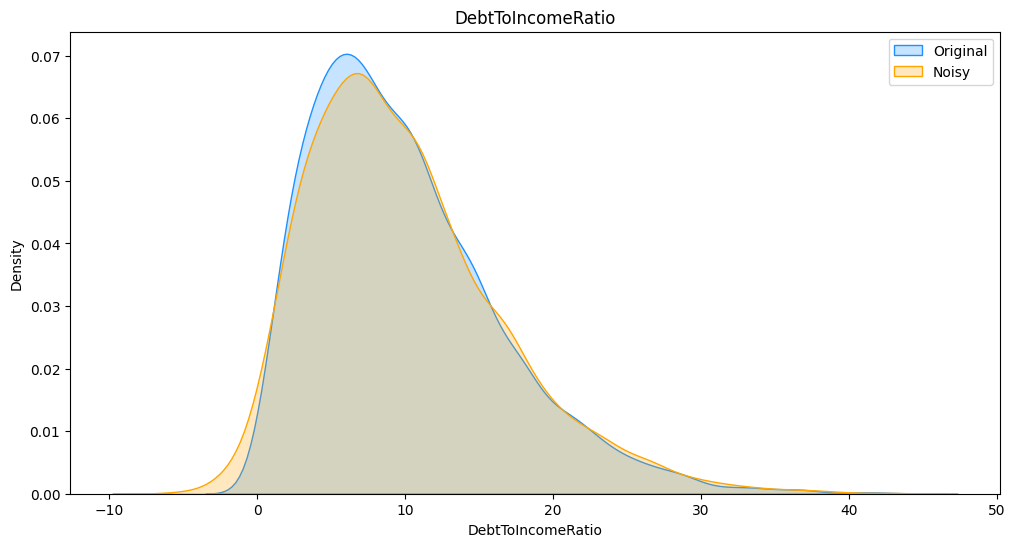

In [11]:
 # Define the sensitivity and epsilon for each column
sensitivity = { # Adjust value to fine tune risk. The higher, the safer - more noise is added
    'CreditDebt': .29, 
    'CardTenure': .45, 
    'CarValue': .53, 
    'OtherDebt': .39, 
    'DebtToIncomeRatio': .52
}

epsilon = { # Adjust value to fine tune risk. The smaller, the safer - more noise is added
    'CreditDebt': .80, 
    'CardTenure': .46, 
    'CarValue': .4, 
    'OtherDebt': .53, 
    'DebtToIncomeRatio': .43
}

# A copy of the original DataFrame
df_original = df.copy()

# Laplace mechanism applied to each element of the specified columns
for column in ['CreditDebt','CardTenure', 'CarValue', 'OtherDebt', 'DebtToIncomeRatio']:
    df[column] = df[column].apply(lambda x: x + np.random.laplace(loc=0, scale=sensitivity[column]/epsilon[column]))

# Plot comparing the distributions of the original and noisy data
for attribute in ['CreditDebt','CardTenure', 'CarValue', 'OtherDebt', 'DebtToIncomeRatio']:
    plt.figure(figsize=(12,6))
    sns.kdeplot(df_original[attribute], color="dodgerblue", label='Original', fill=True)
    sns.kdeplot(df[attribute], color="orange", label='Noisy', fill=True)
    plt.legend()
    plt.title(attribute)
    plt.show()



# Equivalence Classes  

We formed *Equivalence Classes* based on 5 attributes - *'Region', 'TownSize', 'Gender', 'EducationYears', 'JobCategory'.* An equivalence class is a group of individuals who share the same attributes. We then calculate the risk of associated with the equivalence class. The assumption is that smaller equivalence classes, or a small group of people sharing the same attributes, puts individuals at a higher risk of being identified. 

In [12]:
# Create equivalence classes based on selected columns
df['equivalence_class'] = df[['Region', 'TownSize', 'Gender', 'EducationYears', 'JobCategory']].apply(lambda x: '-'.join(x.astype(str)), axis=1)

# Calculate the size of each equivalence class
equivalence_class_sizes = df['equivalence_class'].value_counts()

# Calculate the risk of re-identification for each equivalence class
df['re_identification_risk'] = df['equivalence_class'].apply(lambda x: 1 / equivalence_class_sizes[x])


# Attack Scenario Risk

In this section you will find an analysis of the risk invovled in 4 scenarios: 

1. A Deliberate Data Attack
2. An Inadvertent Data Attack
3. A Data Breach
4. A Demonstration Attack

## Scenario 1
To Calculate the risk of scenario one, we used the information provided with the scenario:   
        
- "There are about 160 employees of the data recipient with access to the data. We want to be conservative and say that 30 of these employees may go rogue – then probability of attempt is 30/160." 

## Scenario 2
We used the provided assumption from the scenario:

- "Probability of acquaintance; this probability is calculated by considering that on average people tend to have 150 friends"

We then took the worst case assumption, that all the 150 people the average person knows are in that dataset.  
        
(150 / 4999) * 100 = 3%

## Scenario 3
To caclulate the risk for scenario 3, we initially went with the numbers provided in the scenario:

- "We know that approximately 27% of providers that are supposed to follow the HIPAA Security Rule have a reportable breach every year."

However, a recent Forbes article explains that “during the past 12 months, 34.5% of polled executives report that their organizations' accounting and financial data were targeted by cyber adversaries" (Brooks, 2023). Out of caution, we bumped up our risk factor from 27% to 34.5% for these calculations.

## Scenario 4
In scenario 4, we operate under the assumption that data is publicly disclosed and that an intruder can now attempt to re-identify based on other available data sets. We can't know all the people who will come across the data set, so this scenario is based off the base *re_identification_risk* we determined earlier as part of defining our Equivalence Classes.

# Results
You will find that scenario's two and four provide the most risk. On initial obeservation, one could assume some individuals face almost certain risk of exposure. It is reasonable to believe these individuals may be outliers. Below you will find graphs comparing the risk provided by the four scenarios. The Average risk of all scenarios is below 20%, while for scenario one and three that number falls under 10%. Furthermore, a Density Plot, Ridgeline Plot, and Heatmap show that there is low density for 100% risk, indicating that there is less risk than we initially observed.


In [13]:
## Scenario 1
probability_of_attack = 30 / 160
df['scenario_one'] = df['re_identification_risk'] * probability_of_attack

## Scenario 2
probability_of_acquaintance = 0.3
df['scenario_two'] = df['re_identification_risk'] * probability_of_acquaintance

## Scenario 3
probability_of_breach = 0.345
df['scenario_three'] = df['re_identification_risk'] * probability_of_breach

## Scenario 4
sensitivity = 1 # binary value, treat all data as safe for the sake of caution
df['scenario_four'] = df['re_identification_risk'] * sensitivity

df[['scenario_one', 'scenario_two','scenario_three','scenario_four']].sort_values(by=['scenario_one', 'scenario_two','scenario_three', 'scenario_four'], ascending=False)


,scenario_one,scenario_two,scenario_three,scenario_four
58,0.187500,0.300000,0.345000,1.000000
99,0.187500,0.300000,0.345000,1.000000
110,0.187500,0.300000,0.345000,1.000000
144,0.187500,0.300000,0.345000,1.000000
195,0.187500,0.300000,0.345000,1.000000
...,...,...,...,...
4498,0.004808,0.007692,0.008846,0.025641
4532,0.004808,0.007692,0.008846,0.025641
4617,0.004808,0.007692,0.008846,0.025641
4618,0.004808,0.007692,0.008846,0.025641


In Scenario 4, we noticed several individuals at 1 or 100% risk. The script below counts how many individuals in the dataset are at 100%. We then divide that by the total number of records in the set, and multiply it by 100 to get our risk.

In [14]:
count = 0
for item in df['scenario_four']:
    if item == 1.0:
        count += 1
print(count)

114


In [15]:
scenario_four_risk = (114 / 4999) * 100
print(f'''
Risk of at risk individuals being identified 
--------------------------------------------
{scenario_four_risk}%''')


Risk of at risk individuals being identified 
--------------------------------------------
2.2804560912182437%


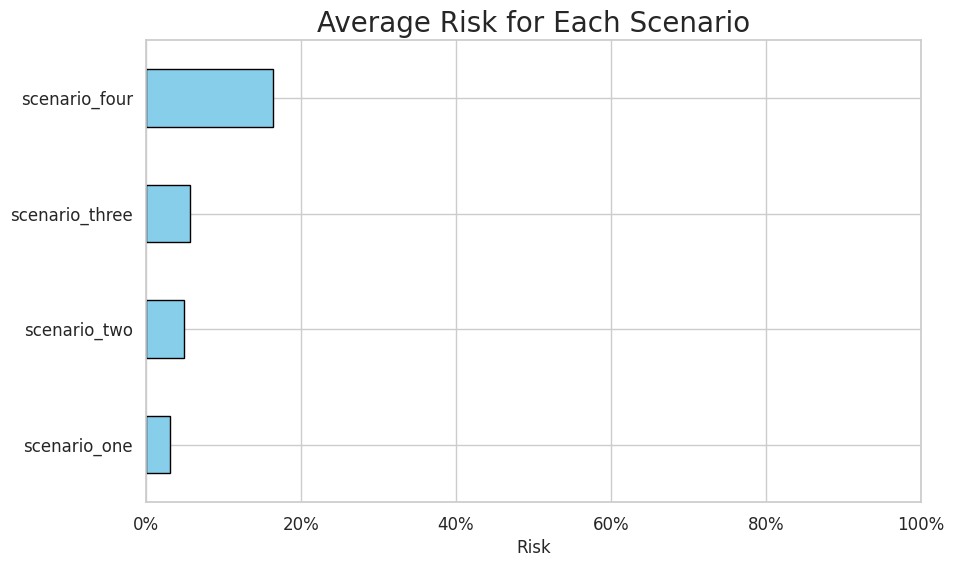

In [16]:
scenarios = df[['scenario_one', 'scenario_two','scenario_three','scenario_four']]

# Compute the mean risk for each scenario
mean_risk = scenarios.mean()

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# Plot - Mean Risk
ax = mean_risk.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Risk')
plt.title('Average Risk for Each Scenario', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Convert x-axis to percentage format
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
ax.xaxis.set_major_formatter(formatter)

plt.xlim([0, 1])

plt.show()


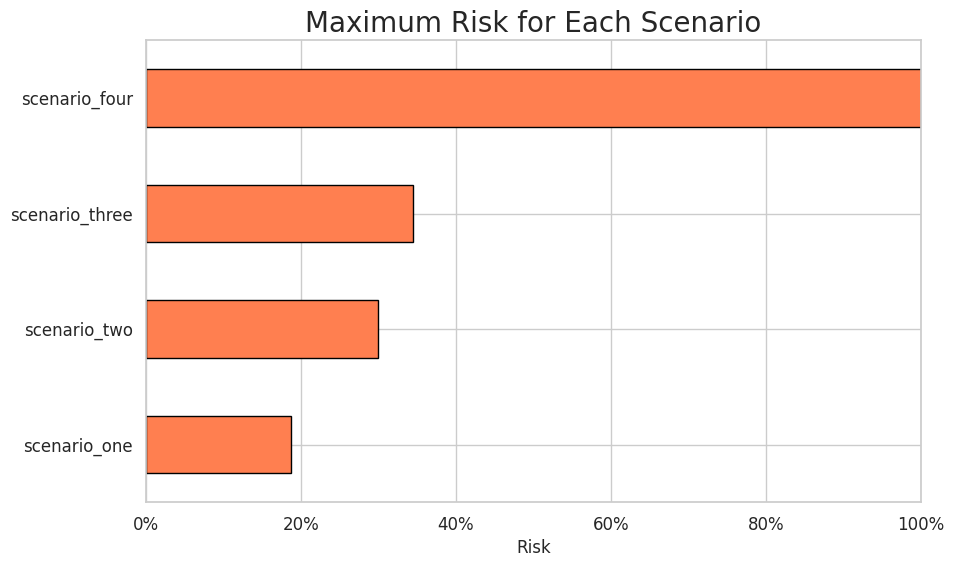

In [17]:
# Compute the max risk for each scenario
max_risk = scenarios.max()

# Plot - Max Risk
plt.figure(figsize=(10,6))
ax = max_risk.sort_values().plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Risk')
plt.title('Maximum Risk for Each Scenario', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Convert x-axis to percentage format
ax.xaxis.set_major_formatter(formatter)

plt.xlim([0, 1])

plt.show()

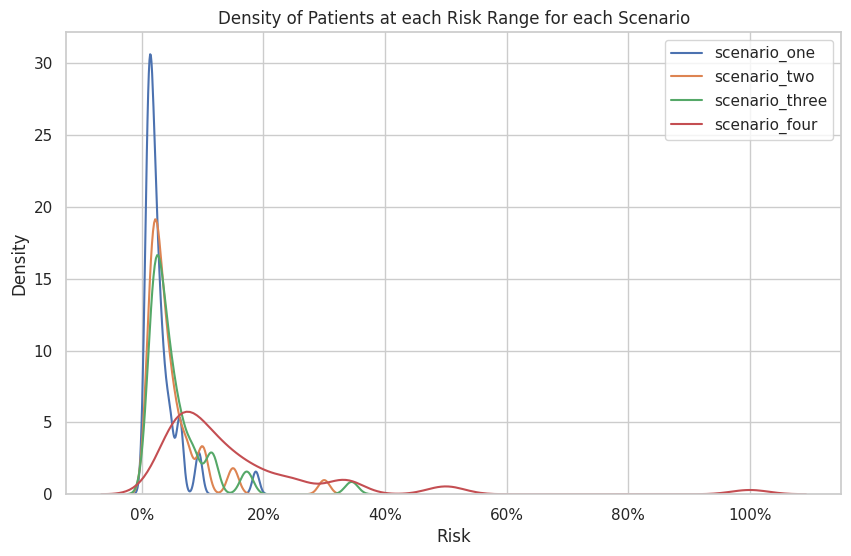

In [18]:
patients_in_risk = scenarios

bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  

plt.figure(figsize=(10, 6))

for col in patients_in_risk.columns:
    sns.kdeplot(patients_in_risk[col], label=col)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(loc='upper right')
plt.title('Density of Patients at each Risk Range for each Scenario')
plt.xlabel('Risk')
plt.ylabel('Density')

plt.show()

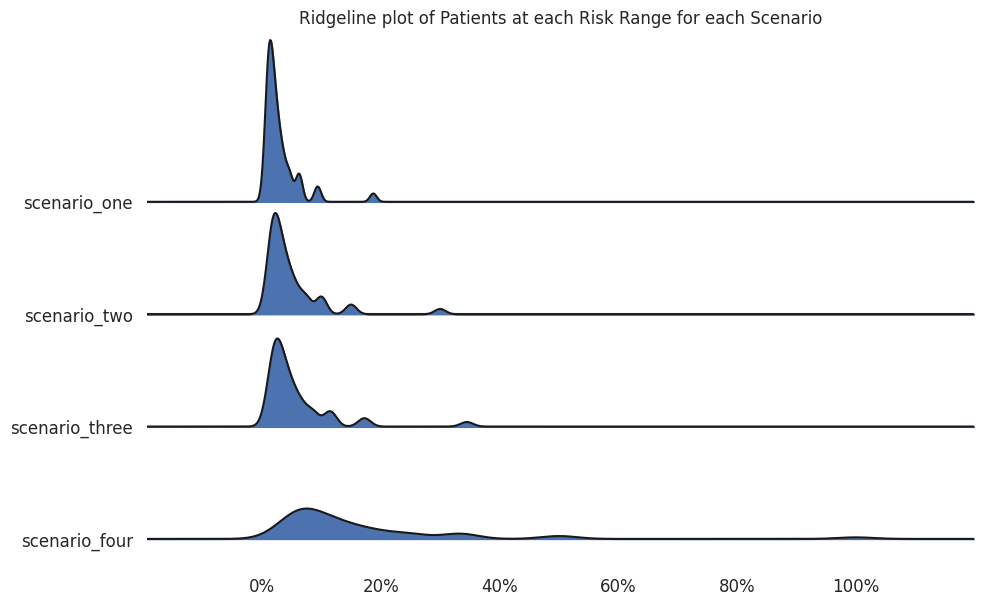

In [19]:
fig, axes = joypy.joyplot(patients_in_risk, figsize=(10, 6))

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Ridgeline plot of Patients at each Risk Range for each Scenario')
plt.show()

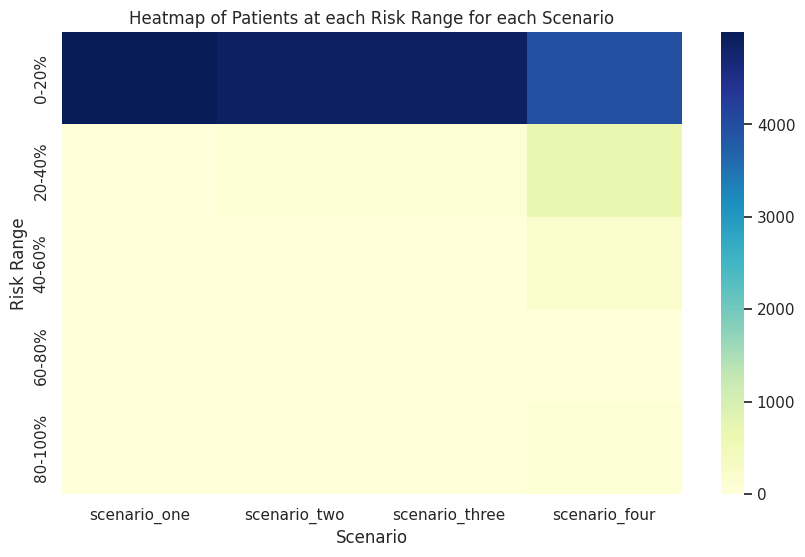

In [20]:
# DataFrame to hold the binned data
heatmap_data = pd.DataFrame()

# Calculate the counts for each bin for each scenario
for col in patients_in_risk.columns:
    heatmap_data[col] = pd.cut(patients_in_risk[col], bins=bins, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']).value_counts()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')

plt.title('Heatmap of Patients at each Risk Range for each Scenario')
plt.xlabel('Scenario')
plt.ylabel('Risk Range')

plt.show()

# Conclusion

In conclusion, we established which identifiers to remove, mask, or add noise to based on:
    - The usefulness of the data
    - The risk the data poses

For instance, Union Membership isn't relevant therefore it isn't very useful. However, if this dataset were to be cross-referenced with Union Membership datasets, individuals face increased risk of being re-identfied. 

For financial data, we instead chose to protect the data sets using differential privacy. We added noise to the data so that it could retain it's use for statistical analysis while mitigating risk.

We were also able to visualize the data using plots. This allowed us to see the relationship between risk, utility, and the different attack scenarios. While at first glance we were alarmed by individuals with high risk, our plots demonstrated that because the density of those individuals is so low, the risk of re-identification is also low, 2.3%.

In [21]:
# Save the masked data
df.to_csv('masked_data.csv', index=False)

# References
Australia Bureau of Statistics. (2021, 11 8). Understanding re-identification. Australian Bureau of  
        Statistics. Retrieved June 30, 2023, from https://www.abs.gov.au/about/data-services/data-confidentiality-guide/understanding-re-identification  


Brooks, C. (2023, 3 5). Cybersecurity Trends & Statistics For 2023; What You Need To Know.  
Forbes. https://www.forbes.com/sites/chuckbrooks/2023/03/05/cybersecurity-trends--statistics-for-2023-more-treachery-and-risk-ahead-as-attack-surface-and-hacker-capabilities-grow/?sh=5f354ee919db  
  

Dwork, C. (2016). The Definition of Differential Privacy. YouTube.  
        https://www.youtube.com/watch?v=lg-VhHlztqo&list=PLdDZb3TwJPZ7Ug5Ydu1j9V1m_RgtW7C9_&index=2&t=39s  


Henriksen-Bulmer, J., & Jeary, D. S. (2016). Re-identification attacks—A systematic literature  
        review. International Journal of Information Management, Volume 36(Issue 6). https://www.sciencedirect.com/science/article/abs/pii/S0268401215301262  

        
Nissim, K., Steinke, T., Wood, A., Bun, M., Gaboardi, M., O'Brien, D. R., & Vadhan, S. (2017, 3 3).  
        Differential Privacy: A Primer for a Non-technical Audience (Perliminary version). http://privacytools.seas.harvard.edu  


Roth, A. (n.d.). Lecture 1: Introduction to Differential Privacy and the Laplace Mechanism  
        [Lecture Notes]. In University of Pennsylvania. Computer and Information Science | A  
        Department of the School of Engineering and Applied Science. Retrieved June 30, 2023, from https://www.cis.upenn.edu/~aaroth/chatgpt_lecture_notes.pdf  
  
        
Rothblum, G. (2016, November 12). Composition: The Key to Differential Privacy is Success. In  
Differential Privacy Symposium. https://www.youtube.com/watch?v=RNqZJDAP1uU&t=859s